<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/scramjet_hypersonic_combustion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypersonic Scramjet Simulation (1D Quasi-Steady)
This notebook simulates compressible flow through a scramjet using a 1D model. It includes a combustion region with added heat to model a supersonic combustion chamber.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Domain setup
nx = 400
x = np.linspace(0, 1.0, nx)
dx = x[1] - x[0]
A = 1 + 1.5 * (x - 0.5)**2

# Initial hypersonic conditions
rho = np.ones(nx) * 0.4
u = np.ones(nx) * 1500
p = np.ones(nx) * 20000
gamma = 1.4
R = 287.0
T = p / (rho * R)

def compute_E(rho, u, p):
    return p / (gamma - 1) + 0.5 * rho * u**2

E = compute_E(rho, u, p)

# Combustion heat zone
q_add = np.zeros_like(x)
q_add[(x > 0.45) & (x < 0.55)] = 2e5  # J/kg

# Time integration
CFL = 0.5
t_final = 0.01
t = 0.0
while t < t_final:
    T = p / rho
    a = np.sqrt(gamma * p / rho)
    dt = CFL * dx / np.max(np.abs(u) + a)

    F1 = rho * u
    F2 = rho * u**2 + p
    F3 = (E + p) * u

    rho_new = 0.5 * (np.roll(rho, -1) + np.roll(rho, 1)) - dt / (2 * dx) * (np.roll(F1, -1) - np.roll(F1, 1))
    u_new = (0.5 * (np.roll(u, -1)*np.roll(rho, -1) + np.roll(u, 1)*np.roll(rho, 1)) -
              dt / (2 * dx) * (np.roll(F2, -1) - np.roll(F2, 1))) / rho_new
    E_new = (0.5 * (np.roll(E, -1) + np.roll(E, 1)) -
              dt / (2 * dx) * (np.roll(F3, -1) - np.roll(F3, 1)))

    E_new += rho_new * q_add * dt
    p_new = (gamma - 1) * (E_new - 0.5 * rho_new * u_new**2)

    rho, u, E, p = rho_new, u_new, E_new, p_new
    t += dt

T = p / rho
Mach = u / np.sqrt(gamma * R * T)

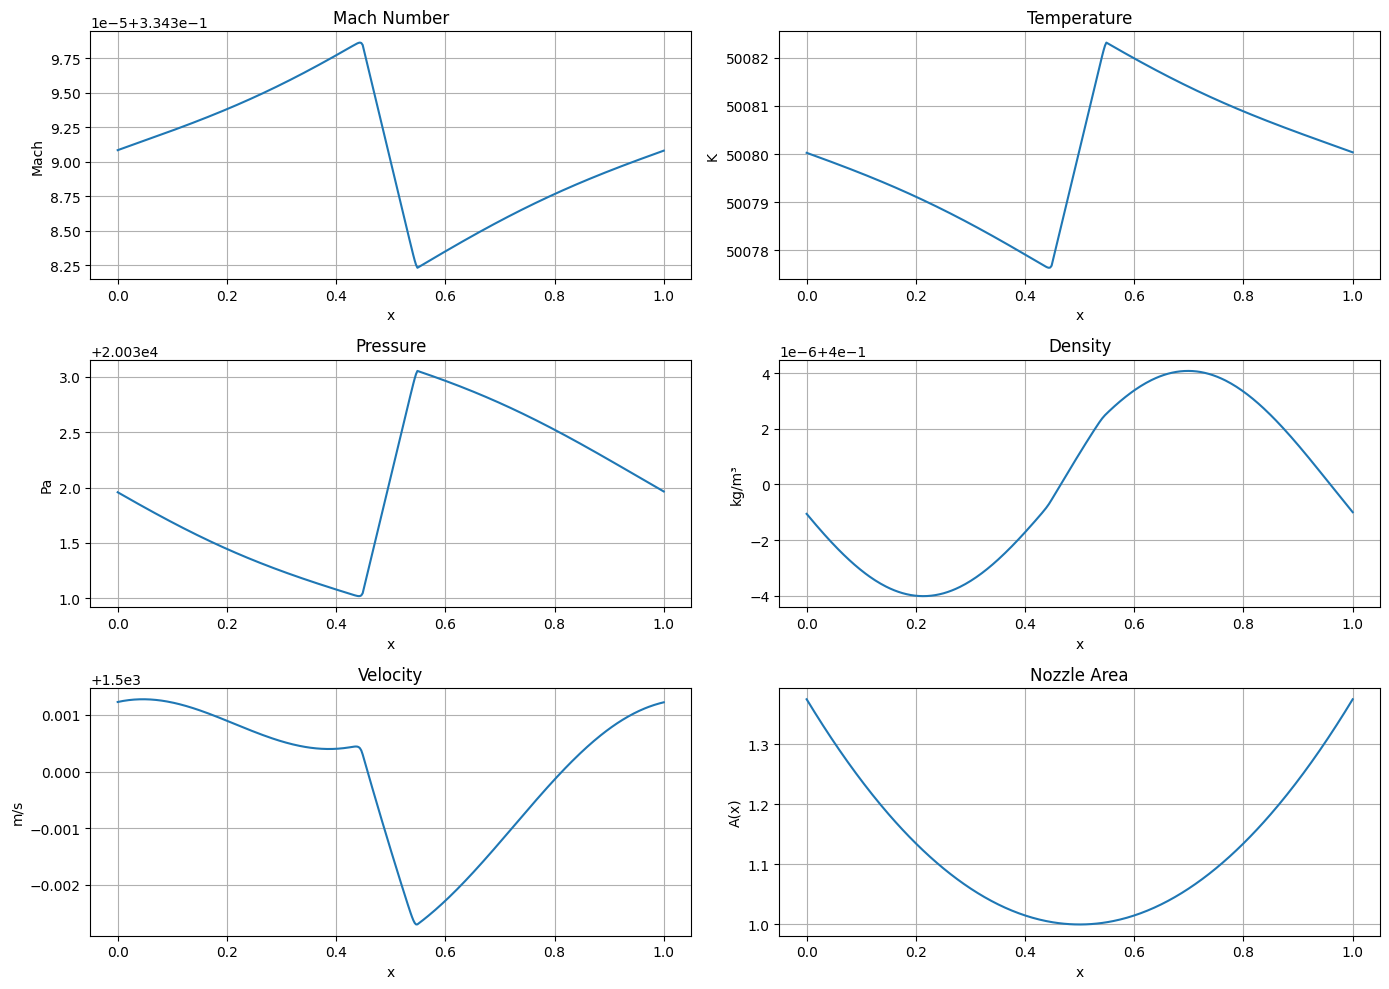

In [2]:
# Plots
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
axs = axs.flatten()

axs[0].plot(x, Mach); axs[0].set_title('Mach Number'); axs[0].set_ylabel('Mach'); axs[0].grid()
axs[1].plot(x, T); axs[1].set_title('Temperature'); axs[1].set_ylabel('K'); axs[1].grid()
axs[2].plot(x, p); axs[2].set_title('Pressure'); axs[2].set_ylabel('Pa'); axs[2].grid()
axs[3].plot(x, rho); axs[3].set_title('Density'); axs[3].set_ylabel('kg/m³'); axs[3].grid()
axs[4].plot(x, u); axs[4].set_title('Velocity'); axs[4].set_ylabel('m/s'); axs[4].grid()
axs[5].plot(x, A); axs[5].set_title('Nozzle Area'); axs[5].set_ylabel('A(x)'); axs[5].grid()

for ax in axs: ax.set_xlabel('x')
plt.tight_layout(); plt.show()